This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Matplotlib Documentation](https://matplotlib.org/3.1.1/api/pyplot_summary.html)

[Pandas EDA Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_Cleaning_and_Exploring_Cheat_Sheet.ipynb)

[Pandas Data Wrangling Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_wrangling_cheatsheet.pdf)

[Matplotlib Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/MatplotLib_Cheat_Sheet.ipynb)

# Setup

Import and alias the following libraries:
- numpy
- pandas
- matplot
- seaborn

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the auto data csv below and verify it's contents

In [99]:
auto_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [100]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,?,audi,gas,std,two,sedan,fwd,front,99.80,177.30,66.30,53.10,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.80,192.70,71.40,55.70,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,?,audi,gas,std,four,wagon,fwd,front,105.80,192.70,71.40,55.70,2954,ohc,five,136,mpfi,3.19,3.40,8.50,1

You should see there are no column headers. Read in the csv with the column names below and then check the first 5 and last 5 rows of the data frame

In [101]:
columns = ['symboling','norm_loss','make','fuel','aspiration','doors',
           'bod_style','drv_wheels','eng_loc','wheel_base','length','width',
           'height','curb_weight','engine','cylinders','engine_size',
           'fuel_system','bore','stroke','compression','hp','peak_rpm',
           'city_mpg','hgwy_mpg','price']

In [102]:
# Loading data from url
autos = pd.read_csv(auto_url, names = columns)
print(autos.shape)
autos.head()

(205, 26)


,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [103]:
autos.tail()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [104]:
autos.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors           object
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp              object
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
price           object
dtype: object

 Check for nulls and any values that may be a placeholder for nulls

In [105]:
autos.isnull().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
price          0
dtype: int64

Replace the placeholders with `NaN` and then recheck for nulls.

# Exploration

Find the following information about the dataframe:
- Get the descriptive statistics for ALL features (numeric and categorical)
- Get the data types for all features
- What are the unique values for the `doors` column
- How many rows and columns are in the dataframe?

In [106]:
autos.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression,city_mpg,hgwy_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [107]:
autos.describe(exclude='number')

,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,engine,cylinders,fuel_system,bore,stroke,hp,peak_rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [108]:
autos['doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [109]:
autos['doors'].value_counts()

four    114
two      89
?         2
Name: doors, dtype: int64

In [110]:
autos.replace({'doors':'?'}, np.NaN, inplace = True)

In [111]:
autos['doors'].value_counts()

four    114
two      89
Name: doors, dtype: int64

In [112]:
autos.replace('?', np.NaN, inplace = True)

In [113]:
autos.isnull().sum()

symboling       0
norm_loss      41
make            0
fuel            0
aspiration      0
doors           2
bod_style       0
drv_wheels      0
eng_loc         0
wheel_base      0
length          0
width           0
height          0
curb_weight     0
engine          0
cylinders       0
engine_size     0
fuel_system     0
bore            4
stroke          4
compression     0
hp              2
peak_rpm        2
city_mpg        0
hgwy_mpg        0
price           4
dtype: int64

# Cleaning and Feature Engineering

Complete the following actions on the dataframe:
- Fill in the null values in the dataframe without dropping any rows or columns
- Convert the `doors` column to `int`
- Drop the `eng_loc` column
- Create a new column in the df that is the `hp` divided by `price`

In [114]:
autos = autos.fillna(method = 'ffill')

In [115]:
autos.isnull().sum()

symboling      0
norm_loss      3
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
price          0
dtype: int64

In [116]:
autos['norm_loss'] = autos['norm_loss'].fillna(method = 'bfill')

In [117]:
autos.isnull().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
price          0
dtype: int64

In [118]:
autos['doors'].replace({'two':2, 'four':4}, inplace = True)

In [119]:
autos['price']= autos['price'].astype(int)

In [120]:
autos['hp']=autos['hp'].astype(str).astype(int)

In [121]:
autos.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors            int64
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp               int64
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
price            int64
dtype: object

* Drop the eng_loc column
* Create a new column in the df that is the hp divided by price

In [122]:
autos.drop(['eng_loc'], axis = 1)


,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,164,alfa-romero,gas,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,4,sedan,rwd,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,4,sedan,rwd,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [123]:
autos.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors            int64
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp               int64
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
price            int64
dtype: object

In [124]:
autos['hp_per_price'] = autos['hp']/autos['price']

In [125]:
print(autos.shape)
autos.head()

(205, 27)


,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price,hp_per_price
0,3,164,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,0.008225
1,3,164,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0.006727
2,1,164,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0.009333
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,0.007312
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0.006590


In [126]:
autos['cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [129]:
autos['cylinders'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}, inplace = True)
autos['cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinders, Length: 205, dtype: int64

## Questions of Understanding
*Double click the markdown cell to add your answer*

1. What does it mean to engineer a feature?
```
Your Answer Here
```
2. What is a `NaN` and why do we care about them?
```
Your Answer Here
```

# Basic Visualizations

Make the following basic graphs with the features in the dataframe:
- Line Plot
- Scatterplot
- Histogram
- Bar Graph
- Density

All graphs should have a title, and label for each axis

## Questions of Understanding
*Double click the markdown cell to add your answer*

Name a graph you would use for the following cases:
- Distribution: `Your Answer Here`
- Change Over Time: `Your Answer Here`
- Correlation: `Your Answer Here`

You may find the answers in the Resources section above or through Google

# Crosstabs and Pivot Tables

Make a crosstab of two of the categorical features

Make a graph from the crosstab

In a sentence or two, explain how to read the table and what the values mean
```
Your Answer Here
```

Make a crosstab with a categorical feature and price
- Use `pd.cut` to create 5 bins for price

Make a graph from the crosstab

In a sentence or two, explain how to read the table and what the values mean
```
Your Answer Here
```

Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

In a sentence or two, explain how to read the table and what the values mean
```
Your Answer Here
```

# Interpretations

Write a short paragraph explaining some of the things you learned from the dataset. Avoid low hanging fruit like simply writing about the different descriptive stats. Focus on interesting relationships between columns, what you see in the graphs, etc.

# Tidy and Join

Combine `df_a`, `df_b`, and `df_c` joining on the ids in `df_a` to reveal the real names of The Hulk, Spiderman, and Superman.

In [ ]:
df_a = pd.DataFrame({'id_b':[1,2,3], 'id_c': [4,5,6]})
df_a

In [ ]:
df_b = pd.DataFrame({'id':[1,2,3], 'first_name': ['Bruce', 'Peter', 'Clark']})
df_b

In [ ]:
df_c = pd.DataFrame({'id': [4,5,6], 'last_name': ['Banner', 'Parker', 'Kent']})
df_c

Use `melt` to change the dataframe below to look like the image below.

In [ ]:
messy = pd.DataFrame({'a': ['A', 'B', 'C'], 
                      'b': [1, 2, 3],
                      'c': [4, 5, 6],
                      'd': [7, 8, 9]})

messy

Make this:

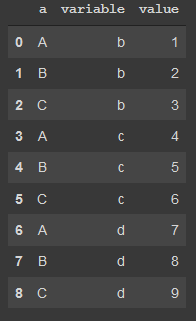

1. In a sentence or two, explain what the tidy data format is.
```
Your Answer Here
```

2. What are the types of joins
```
Your Answer Here
```

# Snazzy Graphs

Run the code below

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [ ]:
from IPython.display import display, Image

png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

Recreate the FiveThirtyEight graph. Try to include:
- All text in the orginal graph (except the watermark) is present in your graph and in the same locations
- All text in your graph is roughly the same size and look of the original graph
- Gridlines, Ticklabels, and tickmark spacing matches
- Coloring and/or style matches.